# Study of the distribution of participants in the [#DataCleaningchallenge](https://twitter.com/hashtag/DataCleaningchallenge?src=hashtag_click) organised by [@PromiseNonso_](https://twitter.com/PromiseNonso_)

## You can reach me on twitter as [@chusk2](https://twitter.com/chusk2) and follow my github repositories at [danicoder github](https://github.com/chusk2)  
Both my [#DataCleaningchallenge](https://github.com/chusk2/data_cleaning_challenge_fifa21)
and [phone scrapping](https://github.com/chusk2/phone_scrapping) can be found in my github repositories.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Accessing Developers Tools

#### Firefox and Chrome: Options --> More Tools -->  Web Developer Tools

## Right click on the html code selected on the right side of the screen and Select: Copy --> Inner HTML

Paste the content of the clip paper into a text editor and save the content as txt file, for example.

I have the content saved as `contacts.txt`

## 1. Read the content of the text file

### <span style='color: red'>Originally the phone numbers where in plain text. I have worked on a solution to mask them. The code below was used to get the result you can see in encrypted phone numbers.</span>

In [2]:
# with open('data_challenge_whatsapp.txt' , 'r') as file:
#     contacts = file.readlines()

In [3]:
#phone_numbers = contacts[0].split(', ')

In [4]:
#phone_numbers_encripted = phone_numbers.copy()

In [5]:
# def encrypt(phone):
#     if not phone.startswith('+1'):
#         space_pos = phone.find(' ')
#         preffix = phone[:space_pos]
#         numbers = phone[space_pos+1:]
#         encrypted_number = ''
#         for char in numbers:
#             if char != ' ':
#                 encrypted_number += 'X'
#             else:
#                 encrypted_number += '-'
#     else: # +1 (514) 651-4533
#         close_bracket_pos = phone.find(')')
#         preffix = phone[:close_bracket_pos+1]
#         numbers = phone[close_bracket_pos:]
#         encrypted_number = ''
#         for char in numbers:
#             if char != ' ':
#                 encrypted_number += 'X'
#     return preffix + ' ' + encrypted_number           

In [6]:
# encrypted_phones = [encrypt(i) for i in phone_numbers]
# encrypted_phones = ', '.join(encrypted_phones)
# copy the output of encrypted_phones to a text file called encrypted_phone_numbers.txt

## Read the phone numbers from text file

In [7]:
with open('encrypted_phone_numbers.txt' , 'r') as file:
    contacts_encrypted = file.readlines()

In [8]:
#contacts_encrypted

### Now let's do some cleaning  
Firstly, I have a long string with phone numbers, separated by comma. I will use `.split(', ')` to separate them.

In [9]:
phone_numbers = contacts_encrypted[0].split(', ')

In [10]:
phone_numbers[:5]

['+234 XXX-XXX-XXXX',
 '+234 XXX-XXX-XXXX',
 '+254 XXX-XXXXXX',
 '+91 XXXXX-XXXXX',
 '+91 XXXXX-XXXXX']

Secondly, I will take out the country code for each number. They are usually the first group of numbers.  
Note: after some investigation about country phone preffixes, I found out that some codes start with `+1 (xxx)`. So The preffix extraction method needs some retunning.

In [11]:
def extract_preffix(phone_number):
    if phone_number.startswith('+1'):
        preffix = phone_number.split(' ')[:2]
        preffix = preffix[0] + '-' + preffix[1][1:-1]  # remove the parenthesis and join with hyphen
        return preffix
    else:
        return phone_number.split(' ')[0]

In [12]:
whatsapp_preffixes = [extract_preffix(i) for i in phone_numbers]

In [13]:
whatsapp_preffixes[:10]

['+234', '+234', '+254', '+91', '+91', '+234', '+234', '+234', '+234', '+234']

## It looks like Nigeria and Ghana are in da house...

## Now let's make use of pandas to have a count for distinct country codes

In [14]:
whatsapp_preffixes_series = pd.Series(whatsapp_preffixes)
whatsapp_preffixes_series

0      +234
1      +234
2      +254
3       +91
4       +91
       ... 
995     +94
996    +971
997    +977
998    +992
999    +995
Length: 1000, dtype: object

## And now, get the count of unique country codes

In [15]:
whatsapp_preffixes_count = whatsapp_preffixes_series.value_counts().sort_values(ascending=False)
whatsapp_preffixes_count

+234    715
+233     57
+91      52
+254     39
+44      14
       ... 
+57       1
+94       1
+971      1
+977      1
+995      1
Length: 62, dtype: int64

## Now that we have the count values, we need to assign the country code to the country name  
We need some help. I had to look up in the internet for some listing of the country names and country codes

## Load the country codes and country phone preffixes as a python dictionary, using a json file.

In [16]:
with open('international_phone_codes.txt', 'r') as file:
    phone_codes = file.readlines()

In [17]:
phone_codes[:5]

['Afghanistan,+93\n',
 'Albania,+355\n',
 'Algeria,+213\n',
 'American Samoa,+1-684\n',
 'Andorra,+376\n']

## Phone codes need some cleaning

In [18]:
phone_codes = [i.strip('\n').split(',') for i in phone_codes]
phone_codes[:5]

[['Afghanistan', '+93'],
 ['Albania', '+355'],
 ['Algeria', '+213'],
 ['American Samoa', '+1-684'],
 ['Andorra', '+376']]

In [19]:
phone_codes_dic = {}
for line in phone_codes:
    country = line[0]
    code = line[1]
    phone_codes_dic[country] = code

In [20]:
#phone_codes_dic

## For learning purposes, I leave the same code as above, but in the form of a python dictionary comprehension:

In [21]:
# countries = [i[0] for i in phone_codes]
# preffixes = [i[1] for i in phone_codes]
# phone_codes_dic = {k:v for k,v in zip(countries, preffixes) }

## Let's store it in a dataframe 

In [22]:
phone_codes_df = pd.DataFrame( {'country_name': phone_codes_dic.keys(),'preffix' : phone_codes_dic.values() } )

In [23]:
phone_codes_df.sample(5)

,country_name,preffix
110,Kosovo,+383
96,Iran,+98
91,Hong Kong,+852
155,North Korea,+850
231,Vanuatu,+678


A fine tunning: set preffix as index, so queries will be easier later.

In [24]:
phone_codes_df.set_index('preffix', inplace=True)

In [25]:
phone_codes_df.sample(5)

,country_name
preffix,
+226,Burkina Faso
+677,Solomon Islands
+33,France
+65,Singapore
+685,Samoa


Export the `phone_codes_df` to csv in case anyone wants to use it. I'd like to thank ChatGTP, for its unvaluable help.

In [26]:
phone_codes_df.to_csv('international_phone_codes.csv', index=False)

## We're reaching the end of the process  
Now let's get the list of country names for the preffixes of the whatsapp numbers

Do you remember the name of the variable where we stored the whatsapp preffixes? No? Me neither.  
Let's use a trick to list all the variables we have declared so far: `dir()`

`dir()` returns also reserved variables (which start with underscore), so I will filter them and get only the ones we ourselves defined.

In [27]:
variables = [i for i in dir() if not i.startswith('_')]
variables

['In',
 'Out',
 'code',
 'contacts_encrypted',
 'country',
 'exit',
 'extract_preffix',
 'file',
 'get_ipython',
 'line',
 'open',
 'pd',
 'phone_codes',
 'phone_codes_df',
 'phone_codes_dic',
 'phone_numbers',
 'plt',
 'quit',
 'whatsapp_preffixes',
 'whatsapp_preffixes_count',
 'whatsapp_preffixes_series']

That's it. It was called `whatsapp_preffixes_count`

In [28]:
whatsapp_preffixes_count

+234    715
+233     57
+91      52
+254     39
+44      14
       ... 
+57       1
+94       1
+971      1
+977      1
+995      1
Length: 62, dtype: int64

In [29]:
# make prettier the count series
whatsapp_preffixes_count = (whatsapp_preffixes_count.to_frame()
     .reset_index()
     .rename(columns = {'index' : 'preffix', 0 : 'count'})
)

In [30]:
whatsapp_preffixes_count

,preffix,count
0,+234,715
1,+233,57
2,+91,52
3,+254,39
4,+44,14
...,...,...
57,+57,1
58,+94,1
59,+971,1
60,+977,1


## Let's make the query

## The code below throws an error:  
`KeyError: "['+1-514', '+1-416', '+1-616', '+1-309', '+1-312', '+1-613', '+1-404', '+1-314', '+1-437', '+1-985', '+1-431', '+1-647', '+1-945', '+1-863', '+1-672', '+1-807', '+1-562'] not in index".`  

<span style='color: yellow ; fontsize: 1.5em'>
After some research, I found out those were not international phone preffixes, but from regions in the USA. So I asked my new friend ChatGPT for a list of these preffixes.
</span>

[ChatGPT-4](https://chat.openai.com/chat)

In [31]:
# query = phone_codes_df.loc[whatsapp_preffixes_count.preffix]
# query

## Import and create a new dictionary with the USA region preffixes.

In [32]:
with open('usa_region_codes.txt', 'r') as f:
    usa_region_codes = f.readlines()

In [33]:
usa_region_codes[:5]

['+1 201, New Jersey\n',
 '+1 202, District of Columbia\n',
 '+1 203, Connecticut\n',
 '+1 204, Manitoba, Canada (overlay with 431 and 873)\n',
 '+1 205, Alabama\n']

## USA region codes need some cleaning. After that, I create a dataframe with these new data.

In [34]:
usa_region_codes = [i.strip('\n').split(',') for i in usa_region_codes]
usa_region_codes[:5]

[['+1 201', ' New Jersey'],
 ['+1 202', ' District of Columbia'],
 ['+1 203', ' Connecticut'],
 ['+1 204', ' Manitoba', ' Canada (overlay with 431 and 873)'],
 ['+1 205', ' Alabama']]

In [35]:
usa_region_codes_dic = {}
for line in usa_region_codes:
    region = line[1] + ', USA'
    code = line[0].replace(' ','-')
    usa_region_codes_dic[region] = code

In [36]:
#usa_region_codes_dic

In [37]:
usa_region_codes_df = pd.DataFrame(
    {'country_name' : usa_region_codes_dic.keys(),
     'preffix' : usa_region_codes_dic.values() }
)

In [38]:
usa_region_codes_df.head()

,country_name,preffix
0,"New Jersey, USA",+1-609
1,"District of Columbia, USA",+1-202
2,"Connecticut, USA",+1-203
3,"Manitoba, USA",+1-431
4,"Alabama, USA",+1-334


Export the `usa_region_codes` to csv in case anyone wants to use it. After all, I hope someone can take profit of the time consuming process (thanks, ChatGTP).

In [39]:
usa_region_codes_df.to_csv('usa_region_codes.csv', index=False)

## I need to reset the index so both dataframes can be merged joined by the `preffix` column

In [40]:
phone_codes_df = phone_codes_df.reset_index().rename(columns={'index' : 'preffix'})

In [41]:
phone_codes_df

,preffix,country_name
0,+93,Afghanistan
1,+355,Albania
2,+213,Algeria
3,+1-684,American Samoa
4,+376,Andorra
...,...,...
235,+681,Wallis and Futuna
236,+212,Western Sahara
237,+967,Yemen
238,+260,Zambia


## I will use `pd.concat([df1, df2], axis=0)` to append the new dataframe at the bottom of `phone_codes_df`.

In [42]:
data = pd.concat([phone_codes_df, usa_region_codes_df], axis=0).sort_values('preffix')

Set the `preffix` as an index

In [43]:
data.set_index('preffix', inplace=True)

## Let's try again after the fix

In [44]:
query = data.loc[whatsapp_preffixes_count.preffix]
query

,country_name
preffix,
+234,Nigeria
+233,Ghana
+91,India
+254,Kenya
+44,United Kingdom
...,...
+57,Colombia
+94,Sri Lanka
+971,United Arab Emirates


## I set the index of the query as a column, so I can merge on the preffix column later

In [45]:
query = query.reset_index().rename(columns = {'index' : 'preffix'})

## Finally merge both the query result and the preffixes count

In [46]:
whatsapp_phones_study = pd.merge(query, whatsapp_preffixes_count, on='preffix')

In [47]:
whatsapp_phones_study

,preffix,country_name,count
0,+234,Nigeria,715
1,+233,Ghana,57
2,+91,India,52
3,+254,Kenya,39
4,+44,United Kingdom,14
...,...,...,...
58,+57,Colombia,1
59,+94,Sri Lanka,1
60,+971,United Arab Emirates,1
61,+977,Nepal,1


## Finally some graphs for top 5

In [48]:
top5 = whatsapp_phones_study.nlargest(5, 'count')
top5.index = top5.country_name.values

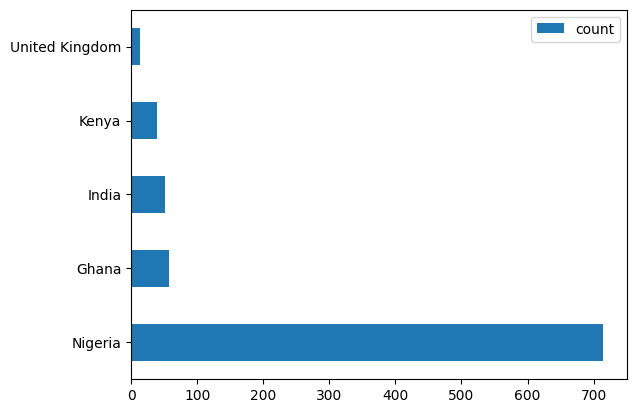

In [49]:
top5.plot.barh(y='count')
plt.show()

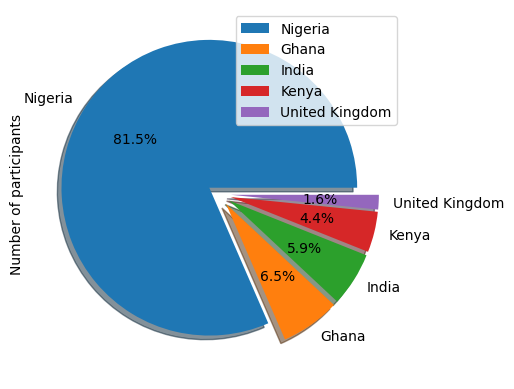

In [51]:
(top5.plot.pie(y='count', x='country_name' , ylabel='Number of participants',
              legend=True, shadow=True, autopct='%1.1f%%', explode=[0.08 for i in range(5)])
)
plt.show()

## <span style='color: orange'>Congratulations. Thanks for reading until this point!</span>